# Predicting Heart Disease using Machine Learning

This notebook looks into various Python-based machine-learning and data-science libraries in an attempt to build an machine-learning model capable of predicting whether or not someone has heart-disease based on their medical attributes.

We are going to take the following approach:-
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart-disease?

## 2. Data

The original data came from Cleavland data from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle : https://www.kaggle.com/ronitf/heart-disease-uci

Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Attribute Information:
Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart-disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each feature in your data.

**Create a data dictionary**

1. age - in years
2. sex - 
    * 1: Male
    * 0: female)
3. cp - chest pain type
    * 0: Typical angina
    * 1: Atypical angina
    * 2: Non-anginal pain
    * 3: Asymptomatic
4. trestbps - Resting blood pressure (in mm Hg on admission to the hospital) anything 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum: LDL + HDL + 0.2*triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
    * above 126 mg/dl signals diabetes
7. restecg - resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina 
    * 1: yes
    * 0: no
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 
    * 3: normal
    * 6: fixed defect
    * 7: reversable defect
14. target - the predicted attribute 
    * 1: Has heart-disease
    * 0: Does not have heart-disease

## Preparing the tools

We are going to use pandas, matplotlib and numpy for data analysis and manipulation

In [5]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Because we want our plots to appear inside jupyter notebook
%matplotlib inline 

# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [8]:
# Create a data frame from csv
df = pd.read_csv("data/heart_disease.csv")

# Have a look at the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
# Check properties of the data frame
df.shape, len(df), df.dtypes

((303, 14),
 303,
 age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca            int64
 thal          int64
 target        int64
 dtype: object)

## Data Exploration (EDA - Exploratory Data Analysis)

Goal here is to find out more about the data and become the subject matter expert on the dataset you're working on

EDA Checklist:

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat diferent types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [15]:
# Let's check many of each class there in the target label
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

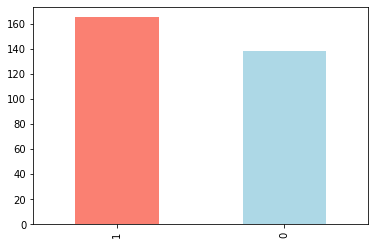

In [16]:
# Create the bar plot for different class of target label values
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [17]:
# Check the different information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
# Check if there are any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
# Check more detailed numerical information about the data like mean, standard deviation etc.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Find Patterns - Target vs Sex
Compare feature 'sex' against the target label and try to find patterns to see how sex of the patient is affecting the target value that is whether the patient has heart-disease or not.

In [21]:
# Check the class of values for sex feature
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [23]:
# Compare target column and sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


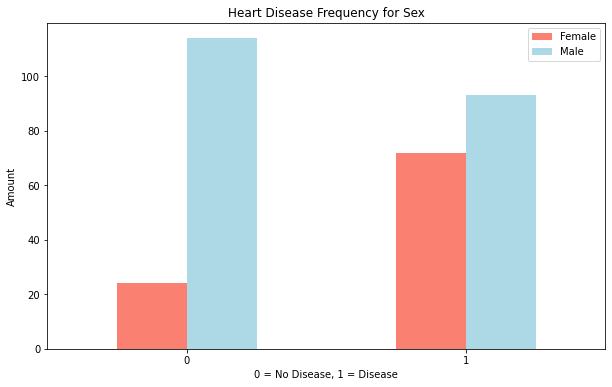

In [26]:
# Create a bar plot for the sex and target column
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0); # To have xticks vertically

### Find Patterns - Age vs thalach (maximum heart rate achieved)  
Compare feature 'thalach' against the "age" and try to find patterns to see how thalach of the patient is affected by the age.

In [27]:
# Check count of different values for thalach feature
df.thalach.value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

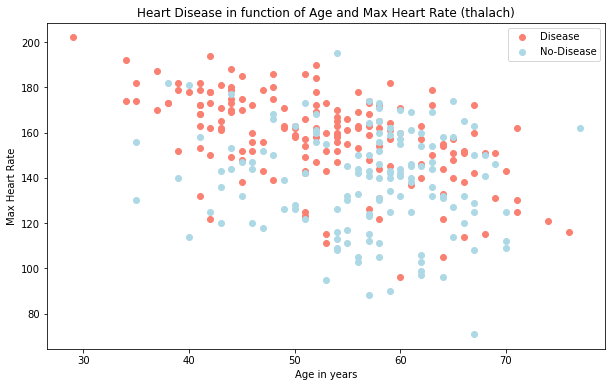

In [35]:
# Since the classes of values is a lot (91) create scatter plot instead of bar plot
# Create a figure
plt.figure(figsize=(10, 6))

# Create scatter plot with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target ==1],
            c="salmon")

# Create scatter plot with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpfull info
plt.title("Heart Disease in function of Age and Max Heart Rate (thalach)")
plt.xlabel("Age in years")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No-Disease"]);

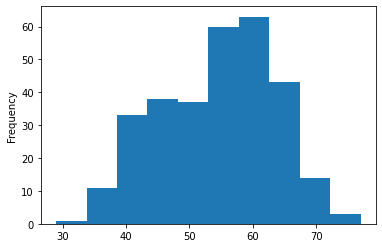

In [36]:
# Check the distribution of age column with a histogram
df.age.plot.hist();

### Find Patterns - Heart Disease vs cp (chest pain type)  
Compare feature 'target' against the "cp" and try to find patterns to see how chest pain type of the patient affects whether or not patient has heart-disease.

cp - chest pain type

    * 0: Typical angina
    * 1: Atypical angina
    * 2: Non-anginal pain
    * 3: Asymptomatic

In [39]:
# Check count of different values for thalach feature
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [41]:
# Compare target column and cp column
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


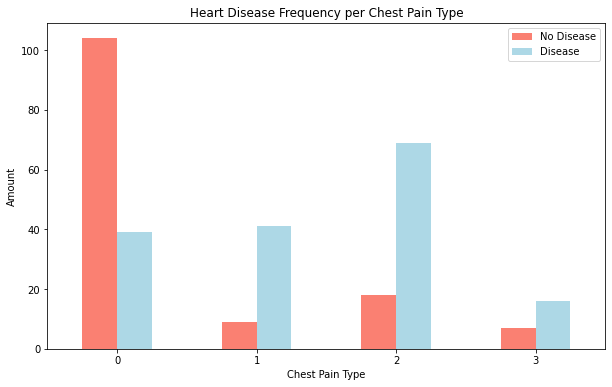

In [43]:
# Create a bar plot for the cp and target column
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Find Patterns - Heart Disease vs exang (exercise induced angina)
Compare feature 'target' against the "exang" and try to find patterns to see how exercise induced angina in the patient affects whether or not patient has heart-disease.

exang - exercise induced angina:

   * 1: yes
   * 0: no

In [47]:
# Check count of different values for exang feature
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

In [48]:
# Compare target column and exang column
pd.crosstab(df.exang, df.target)

target,0,1
exang,,
0,62,142
1,76,23


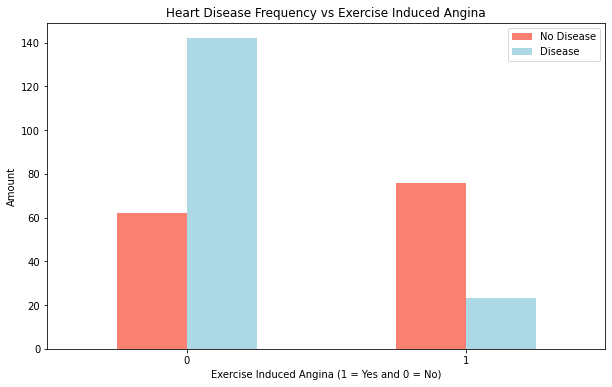

In [49]:
# Create a bar plot for the exang and target column
pd.crosstab(df.exang, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency vs Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina (1 = Yes and 0 = No)")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Build Co-relation Matrix

How each independent attribute is related to other attributes.

* Higher positive value between two features means potential positive co-relation
* Higher negative value between two features means potential negative co-relation

In [44]:
# Make a co-relation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


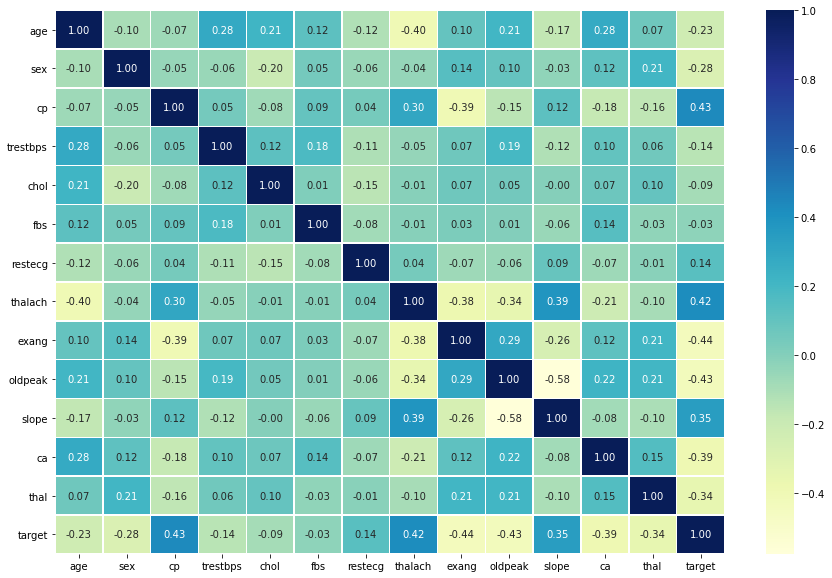

In [46]:
# Let's make out co-relation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 5. Modelling

In [56]:
# Take a peek into the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Preparing our data for modeling

In [52]:
# Split the data into X and Y
X = df.drop("target", axis=1)
Y = df["target"]

# Check X and Y
X.head(), Y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [53]:
# Split the data set into training and test sets
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Check the training and testing data set
X_train.head(), Y_train.head(), X_test.head(), Y_test.head()

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 196      1   0     2  
 75       1   0     2  
 176      2   2     3  ,
 132    1
 202    0
 196    0
 75     1
 176    0
 Name: target, dtype: int64,
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 179   57    1   0       150   276    0        0      112      1      0.6   
 228   59    1   3       170   288    0        0      159      0      0.2   
 111   57    1   2       150   126    1        1      173      0      0.2   
 246

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

We'll test it (use the patterns) on the test set.

### Choosing the right model
Refer to Scikit-Learn Machine Learning Map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
        
We're going to try three different machine learning models
1. Logistic Regression - Despite the name it is a linear model fro classification.
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [58]:
# Put models in a dictionary
models = {"Linear Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create to function to fit and score model
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    # Set the random seed
    np.random.seed(42)
    # Make a dictionary to store model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [59]:
# Check the socres by calling the function
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             Y_train=Y_train, 
                             Y_test=Y_test)
model_scores

E:\StudyMaterial\Data Science\Projects\sample_project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

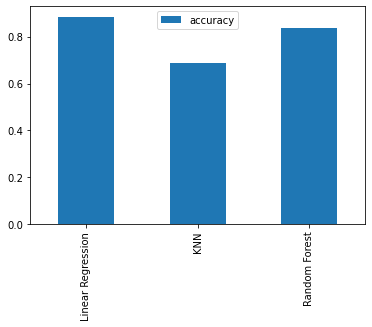

In [64]:
# Create a data frame from model scores dictionary
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
# Create a bar plot 
model_compare.T.plot.bar();

Now we've got the baseline model, and we know a model's first predictions aren't always what we should base our next steps off. What should we do?

Let's look at the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1-Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter Tuning - K Nearest Neighbors

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

##### Tune n_neighbors hyperparameter (by hand)

In [66]:
# Create empty list to store train scores with different hyperparameters
train_scores = []

# Create empty list to store test scores with different hyperparameters
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors 
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(X_train, Y_train)
    # Update the training score list
    train_scores.append(knn.score(X_train, Y_train))
    # Update the test scores
    test_scores.append(knn.score(X_test, Y_test))

In [67]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [68]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


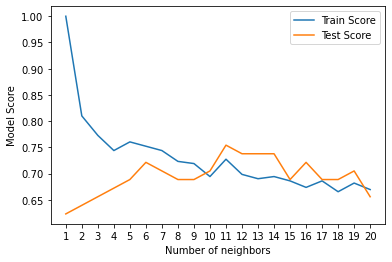

In [73]:
# Create a plot
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning - Using RandomizedSearchCV

We're going to tune:

* Logistic Regression
* RandomForestClassifier

In [84]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create hyperparameter gird for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got the grid of hyperparameters for each model, let's tune them using RandomizedSearchCV

In [78]:
# Set the random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random search hyperparameter for LogisticRegression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [79]:
# Get the best set of hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [80]:
# Now test these parameters on test data
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [85]:
# Let's tune RandomForestClassifier
# Set the random seed
np.random.seed(42)

# Setup random search hyperparameter RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit the random search hyperparameter RandomForestClassifier
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [86]:
# Get the best set of hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [87]:
# Now test these parameters on test data
rs_rf.score(X_test, Y_test)

0.8688524590163934

### Hyperparameter Tuning - Using GridSearchCV

Since our LogisticRegression model provides best scores so far, we'll try to improve them again using GridSearchCV

In [88]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}
# Setup grid hyperparameter search of LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit the grid search hyperparameter LogisticRegression model
gs_log_reg.fit(X_train, Y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [89]:
# Get the best set of hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [90]:
# Now test these parameters on test data
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

## 6. Evaluating our tuned machine learning classifier

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall 
* F1 score

... and it would be great if cross validation was used wherever possible.

To make comparison and evaluate our trained model, first we need to make predictions.

In [92]:
# Make predictions on our trained machine learning classifier on test data
Y_preds = gs_log_reg.predict(X_test)
# Peek the predicted data
Y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### 6.1. ROC Curve and AUC Score

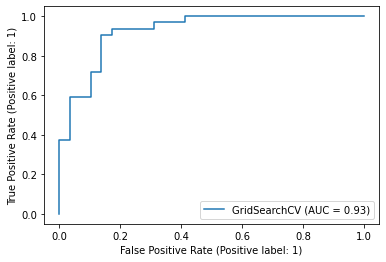

In [93]:
# Import ROC Curve function from sklearn.metrics module
from sklearn.metrics import plot_roc_curve

# Plot the ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, Y_test);

### 6.2. Confision matrix

In [95]:
# Print confusin matrix
print(confusion_matrix(Y_test, Y_preds))

[[25  4]
 [ 3 29]]


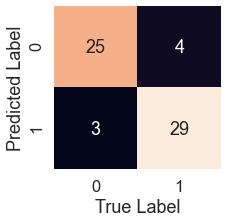

In [97]:
# Draw plot using seaborn for confusion matrix
# Set the font
sns.set(font_scale=1.5)
# Define a function to draw a plot for confusion matrix using seaborn
def plot_conf_matrix(Y_test, Y_preds):
    """
    Plot a nice looking confusion matrix using seaborn heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_matrix(Y_test, Y_preds)

### 6.3. Classification report

In [98]:
# Print the classification report
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### 6.4. Calculate Accuracy, Precision, Recall, and F1 Score using cross-validation

We'll be using cross_val_score to calculate evaluation metrics

In [99]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [100]:
# Create a new classifier with best hyperparameters found
clf = LogisticRegression(C= 0.20433597178569418,
                         solver='liblinear')

In [108]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="accuracy")
# Calculate average accurcay across all five splits
cv_acc = cv_acc.mean()

In [109]:
# Cross validated precison
cv_precision = cross_val_score(clf,
                               X,
                               Y,
                               cv=5,
                               scoring="precision")
# Calculate average precison across all five splits
cv_precision = cv_precision.mean()

In [110]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                               X,
                               Y,
                               cv=5,
                               scoring="recall")
# Calculate average recall across all five splits
cv_recall = cv_recall.mean()

In [111]:
# Cross validated F1 score
cv_f1_score = cross_val_score(clf,
                               X,
                               Y,
                               cv=5,
                               scoring="f1")
# Calculate average F1 score across all five splits
cv_f1_score = cv_f1_score.mean()

##### Visualize our cross validated metrics

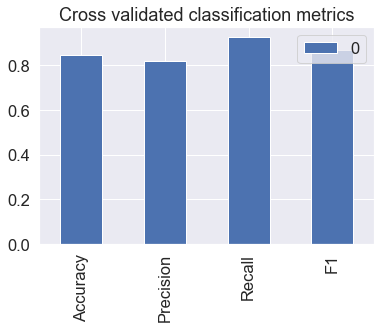

In [112]:
# Create cv_matrix data frame
cv_matrix = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1_score},
                         index=[0])
# Plot the cv_matrix
cv_matrix.T.plot.bar(title="Cross validated classification metrics");